In [1]:
import tensorflow as tf
import librosa
import IPython.display as ipd
import numpy as np
import os
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
sns.set()

## testing the audio using one file and displaying 

In [226]:
audio_file_path = '../audio/female audio wav/09 f.wav'
audio_data, sample_rate = librosa.load(audio_file_path, res_type='kaiser_fast')

In [227]:
sample_rate

22050

In [228]:
audio_data.shape

(732672,)

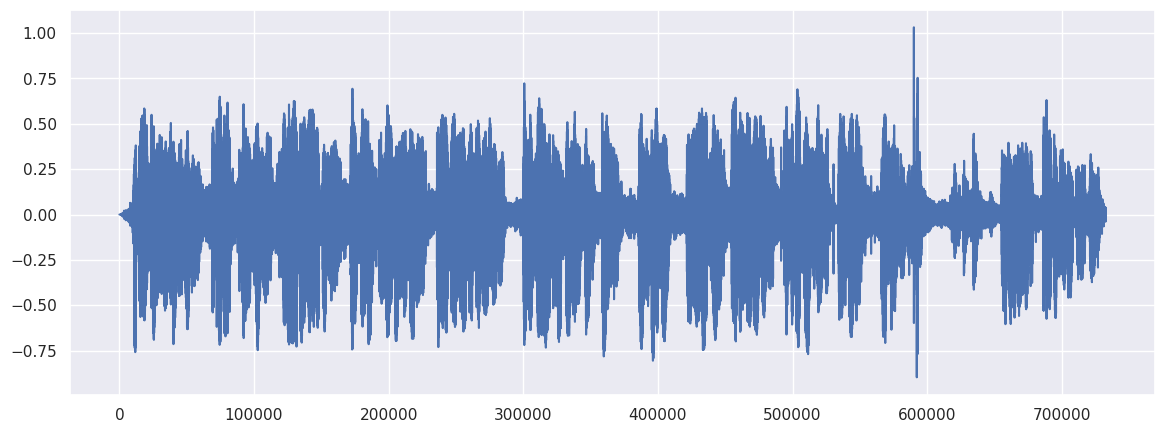

In [229]:
# displaying the wav in graph

plt.figure(figsize=(14, 5))
plt.plot(audio_data)

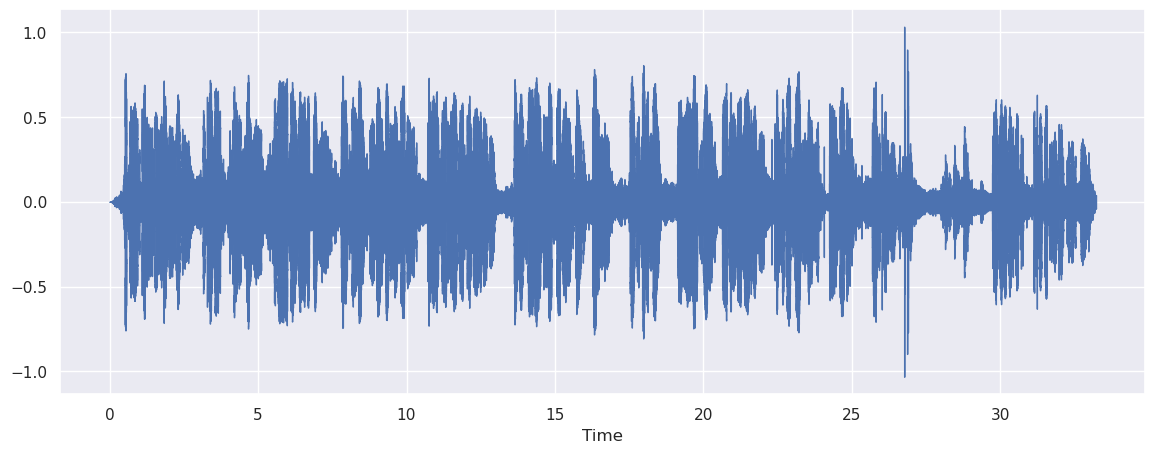

In [230]:
# still displaying the graph of the audio but using librosa
# testing d audio file
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)
ipd.Audio(audio_file_path)

## using mfcc to extract the data for one file

In [232]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=120)
mfccs.shape

(120, 1432)

In [233]:
mfccs

array([[-5.2379242e+02, -5.2379242e+02, -5.1411871e+02, ...,
        -2.5926025e+02, -2.8413141e+02, -3.2088797e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.2946678e+01, ...,
         9.2737473e+01,  9.7695190e+01,  1.0280145e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.1029917e+01, ...,
         5.8469248e+00,  8.4039755e+00,  2.1031025e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  1.1361361e-02, ...,
        -1.5372119e+00, -1.8515697e+00, -1.6075811e+00],
       [ 0.0000000e+00,  0.0000000e+00,  8.1994534e-03, ...,
         4.0640268e+00,  3.4390962e+00,  2.4420357e+00],
       [ 0.0000000e+00,  0.0000000e+00, -6.5498352e-02, ...,
         2.6169360e+00,  2.0800540e+00,  1.0776291e+00]], dtype=float32)

## function for extracting only one file using librosa and mfcc

In [234]:
def feature_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [235]:
# testing the function

a = feature_extractor(audio_file_path)

In [236]:
print(len(a))
print(a.shape)

120
(120,)


## extracting the features for a folder using librosa and mfcc
### extracting the voice for male

In [237]:
# spesifying the folder and then loop through it using the os.listdir

male_audio_folder = '../audio/male audio wav'
files = os.listdir(male_audio_folder)

In [238]:
# looping throgh a folder and appending all the audio dataset to data variable

data = []
for filename in files:
    file = os.path.join(male_audio_folder, filename)
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    data.append(mfccs_scaled_features)

In [239]:
male_extracted_feature = data
male_extracted_feature

[array([-2.40917435e+02,  1.59922638e+02,  2.08137059e+00,  3.58259797e-01,
        -1.53395939e+01,  1.83605347e+01, -7.30569792e+00, -1.50752716e+01,
        -1.21986027e+01, -1.93893075e+00, -1.63189144e+01, -4.35700893e+00,
        -8.42686534e-01, -1.04911537e+01, -6.94013119e+00, -2.47044373e+00,
        -1.22423773e+01, -8.60587883e+00, -8.11803722e+00, -8.33424568e+00,
        -9.31142521e+00, -3.81117415e+00, -1.10626974e+01, -4.44389057e+00,
        -7.05026054e+00, -3.77895951e+00, -6.63009214e+00, -3.29129672e+00,
        -2.19046402e+00,  1.25052154e+00,  2.29789585e-01,  1.66831839e+00,
         2.20303369e+00,  2.12309337e+00,  2.25510383e+00,  3.72363639e+00,
         2.39232779e+00,  3.52959919e+00,  2.33674288e+00,  5.94897807e-01,
         1.78701878e+00,  1.14572239e+00, -7.23421156e-01, -5.49682319e-01,
        -2.66431379e+00, -1.01656783e+00, -1.78146815e+00,  6.64061829e-02,
        -5.68163633e-01, -1.69949782e+00, -1.22694349e+00, -8.28476548e-01,
        -1.5

In [240]:
len(male_extracted_feature)

68

In [241]:
#creating a data frame with the extracted data 
#0ne==1==male and zero==0==female

male_df = pd.DataFrame({'features':male_extracted_feature, 'Gender':np.ones(len(male_extracted_feature))})

In [242]:
male_df.head()

features  Gender
0  [-240.91743, 159.92264, 2.0813706, 0.3582598, ...     1.0
1  [-138.99992, 84.77361, 1.9476094, 35.508812, -...     1.0
2  [-153.681, 77.19316, 26.751108, 37.27909, -13....     1.0
3  [-133.40172, 81.541695, 29.62647, 36.93565, -1...     1.0
4  [-200.25226, 109.53955, 4.53743, 37.070717, -1...     1.0

## extracting female voice using female gender == 0

In [244]:
# spesifying the folder and then loop through it using the os.listdir

female_audio_folder = '../audio/female audio wav'
files = os.listdir(female_audio_folder)

In [245]:
# looping throgh a folder and appending all the audio dataset to data variable
# famale folder

data = []
for filename in files:
    file = os.path.join(female_audio_folder, filename)
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    data.append(mfccs_scaled_features)


In [249]:
female_extracted_features = data

In [250]:
female_extracted_features

[array([-1.49512329e+02,  9.92366333e+01, -2.78261113e+00,  4.08647766e+01,
        -1.99440613e+01,  1.48344154e+01, -1.54842634e+01,  3.68791676e+00,
        -1.72039108e+01, -7.55184507e+00, -6.50607920e+00, -1.02095640e+00,
        -6.89525938e+00, -5.76551445e-02, -5.23828459e+00, -6.12348890e+00,
        -8.63546085e+00, -1.23336840e+00, -6.78187990e+00, -7.51979303e+00,
        -3.78714800e+00, -2.23353243e+00, -7.77756882e+00,  7.08738506e-01,
        -3.55350161e+00,  1.95952857e+00, -6.37425947e+00,  4.16456652e+00,
         2.56072187e+00,  6.75895405e+00,  6.74522066e+00,  1.26646433e+01,
         5.12924862e+00,  3.87747383e+00, -1.66496682e+00, -1.27396786e+00,
        -1.20084131e+00, -7.40439832e-01,  2.98899829e-01, -8.35140049e-01,
        -2.14773607e+00, -1.33941481e-02, -2.24635506e+00,  2.18100473e-01,
        -2.23218393e+00, -1.44530880e+00, -3.30499530e+00, -1.04776227e+00,
        -1.43167436e+00, -6.30446136e-01, -2.55177617e+00, -1.30638409e+00,
        -1.6

In [251]:
len(female_extracted_features)

68

In [252]:
#creating a data frame with the extracted data 
#0ne==1==male and zero==0==female

female_df = pd.DataFrame({'features':female_extracted_features, 'Gender':np.zeros(len(female_extracted_features))})

In [253]:
female_df.head()

features  Gender
0  [-149.51233, 99.23663, -2.7826111, 40.864777, ...     0.0
1  [-140.48512, 94.7186, -3.1315386, 30.889208, -...     0.0
2  [-164.20612, 77.449066, 9.0490465, 28.808783, ...     0.0
3  [-142.15523, 47.58047, 16.224276, 31.68791, -2...     0.0
4  [-189.15857, 91.852875, 31.176016, 36.742294, ...     0.0

## concatenate the both the famele with 0 and male with ones in one data frame

In [254]:
extracted_df = pd.concat([male_df, female_df])
print(extracted_df.head())
print('', '/n')
print(extracted_df.tail())

                                            features  Gender
0  [-240.91743, 159.92264, 2.0813706, 0.3582598, ...     1.0
1  [-138.99992, 84.77361, 1.9476094, 35.508812, -...     1.0
2  [-153.681, 77.19316, 26.751108, 37.27909, -13....     1.0
3  [-133.40172, 81.541695, 29.62647, 36.93565, -1...     1.0
4  [-200.25226, 109.53955, 4.53743, 37.070717, -1...     1.0
 /n
                                             features  Gender
63  [-132.77023, 59.67882, 5.1538186, 44.999615, -...     0.0
64  [-343.61722, 106.68495, -24.066301, 12.447471,...     0.0
65  [-174.91528, 91.092636, -1.1373069, 44.14011, ...     0.0
66  [-116.15841, 57.47399, -2.572014, 19.58784, -2...     0.0
67  [-150.3923, 86.22185, -6.309415, 32.58978, -6....     0.0


In [255]:
# reseting the index cuz the index is not well numbered

extracted_df.reset_index(inplace=True)

In [256]:
extracted_df.drop(['index'], axis=1, inplace=True)

In [257]:
print(extracted_df.head())
print('', '/n')
print(extracted_df.tail())

                                            features  Gender
0  [-240.91743, 159.92264, 2.0813706, 0.3582598, ...     1.0
1  [-138.99992, 84.77361, 1.9476094, 35.508812, -...     1.0
2  [-153.681, 77.19316, 26.751108, 37.27909, -13....     1.0
3  [-133.40172, 81.541695, 29.62647, 36.93565, -1...     1.0
4  [-200.25226, 109.53955, 4.53743, 37.070717, -1...     1.0
 /n
                                              features  Gender
131  [-132.77023, 59.67882, 5.1538186, 44.999615, -...     0.0
132  [-343.61722, 106.68495, -24.066301, 12.447471,...     0.0
133  [-174.91528, 91.092636, -1.1373069, 44.14011, ...     0.0
134  [-116.15841, 57.47399, -2.572014, 19.58784, -2...     0.0
135  [-150.3923, 86.22185, -6.309415, 32.58978, -6....     0.0


## converting the dataframe back to list of numpy.ndarray

In [258]:
y = np.array(extracted_df['Gender'].tolist())
x = np.array(extracted_df['features'].tolist())

In [259]:
y.shape

(136,)

In [262]:
x.shape

(136, 120)

## saving the x and y into in to x_data and y_data
### i comment the below code for saving bcos i dont want to be saving it anytime i run the code

In [263]:
# saving the file in a csv for modeling


np.savetxt('x_120_features.csv', x, delimiter=',')
np.savetxt('y_120_features.csv', y, delimiter=',')

# building the model

## loading the csv file created using librosa in the preprocessing section

In [13]:
x = np.loadtxt('x_120_features.csv', delimiter=',')
y = np.loadtxt('y_120_features.csv', delimiter=',')

In [14]:
print(x.shape)
print(y.shape)

(136, 120)
(136,)


In [15]:
# spliting d data into training and testing dataset


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(108, 120)
(108,)
(28, 120)
(28,)


In [17]:
output_size = 2
hidden_layer_size = 200
num_epochs = 200

In [18]:
#setting an early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax'),
])

In [109]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [110]:
model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=2 )

Epoch 1/200
4/4 - 1s - loss: 3.5153 - accuracy: 0.4630 - val_loss: 1.2867 - val_accuracy: 0.5000 - 1s/epoch - 282ms/step
Epoch 2/200
4/4 - 0s - loss: 1.0074 - accuracy: 0.4630 - val_loss: 0.5294 - val_accuracy: 0.7500 - 95ms/epoch - 24ms/step
Epoch 3/200
4/4 - 0s - loss: 0.5188 - accuracy: 0.7315 - val_loss: 0.3662 - val_accuracy: 0.8929 - 110ms/epoch - 28ms/step
Epoch 4/200
4/4 - 0s - loss: 0.3288 - accuracy: 0.8611 - val_loss: 0.3004 - val_accuracy: 0.9643 - 140ms/epoch - 35ms/step
Epoch 5/200
4/4 - 0s - loss: 0.2305 - accuracy: 0.9074 - val_loss: 0.1781 - val_accuracy: 0.9286 - 104ms/epoch - 26ms/step
Epoch 6/200
4/4 - 0s - loss: 0.1119 - accuracy: 0.9722 - val_loss: 0.1494 - val_accuracy: 0.9286 - 103ms/epoch - 26ms/step
Epoch 7/200
4/4 - 0s - loss: 0.0714 - accuracy: 0.9815 - val_loss: 0.1765 - val_accuracy: 0.8929 - 90ms/epoch - 22ms/step
Epoch 8/200
4/4 - 0s - loss: 0.0538 - accuracy: 0.9815 - val_loss: 0.1639 - val_accuracy: 0.9643 - 102ms/epoch - 25ms/step


In [111]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.1639 - accuracy: 0.9643


In [112]:
test_accuracy

0.9642857313156128

In [113]:
test_loss

0.16390785574913025

In [114]:
print(y_test)
y_test[27]

[1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0.]


0.0

In [115]:
test = x_test[27]
print(test.shape)

(120,)


In [116]:
test = test.reshape(1, -1)

In [117]:
test.shape

(1, 120)

In [118]:
# prediction of x_test

a = model.predict(test)
a[0].round(3)*100

array([97.,  3.], dtype=float32)

In [119]:
if a[0][0] > a[0][1]:
    print('female')
else:
    print('male')

female


## reading preprocess data in csv format for prediction

In [120]:
x_read_csv= np.loadtxt('mercy.csv', delimiter=',')
x_read_csv.shape

(40,)

In [121]:
x_read_csv = x_read_csv.reshape(1, -1)

In [122]:
x_read_csv.shape

(1, 40)

In [123]:
# prediction of x_test

x_read_csv_model = model.predict(x_read_csv)
x_read_csv_model[0].round(3)*100

ValueError: in user code:

    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ziahwadar/anaconda3/envs/newtf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 120, but received input with shape (None, 40)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 40), dtype=float32)
      • training=False
      • mask=None


In [124]:
if x_read_csv_model[0][0] > x_read_csv_model[0][1]:
    print('female')
else:
    print('male')

NameError: name 'x_read_csv_model' is not defined

### function for reading a single audio file for prediction
### and code for playing the audio file

In [149]:
path = '../audio/test/chidi3_2022-10-09_182855389.wav'
audio_data, sample_rate = librosa.load(path, res_type='kaiser_fast')

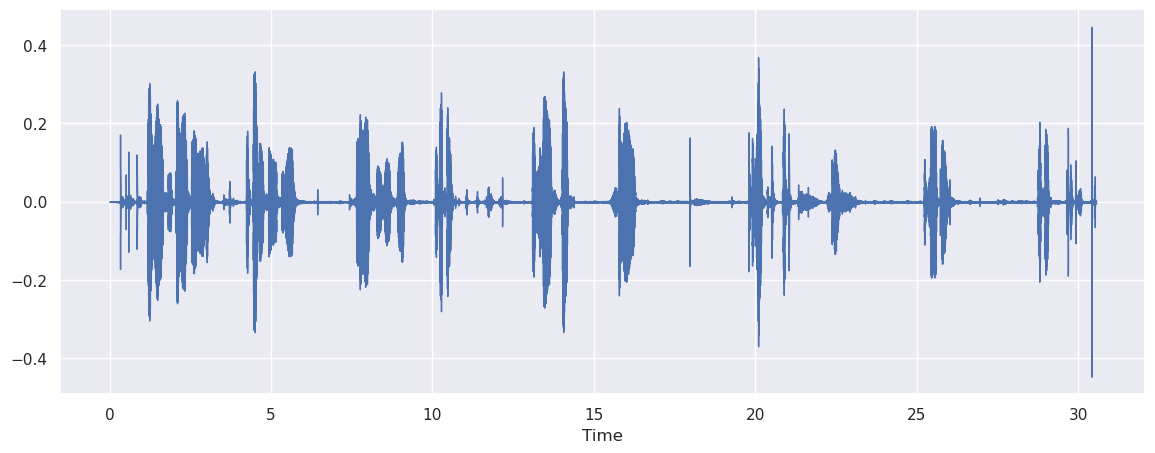

In [150]:
# still displaying the graph of the audio but using librosa
# testing d audio file
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)
ipd.Audio(path)

In [151]:
def feature_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    #mfccs_shape_data = mfccs_scaled_features.reshape(1, -1)
    
    return mfccs_scaled_features #mfccs_shape_data

In [152]:
test_data = feature_extractor(path)

In [153]:
test_data

array([-4.7042709e+02,  1.0852022e+02,  1.7714359e+00,  1.5296483e+01,
        1.8553431e+01, -1.7335063e+00, -9.3709984e+00,  3.0721984e+00,
       -4.8946595e+00, -1.3485459e+00, -3.2661278e+00,  2.0450268e+00,
       -1.2416326e+00, -2.3215747e+00,  3.5037832e+00,  3.8221788e+00,
       -3.4582384e+00,  4.8832577e-01, -1.8643924e+00, -3.4407556e-01,
       -3.9310348e+00, -5.9842360e-01, -2.3929014e+00, -3.6074390e+00,
       -1.7864591e+00, -1.1970370e+00, -2.5581675e+00, -3.3834419e+00,
       -2.0898283e+00, -1.7778580e+00, -2.3930702e+00, -2.7445495e+00,
       -1.7083489e+00, -2.2463191e+00, -1.7147229e+00, -3.5112367e+00,
       -2.0535696e+00, -3.5122397e+00, -2.3883526e+00, -2.4683807e+00,
       -2.3738396e+00, -2.6947489e+00, -2.4353166e+00, -1.8440843e+00,
       -2.5811036e+00, -2.6467588e+00, -1.8626487e+00, -1.5276462e+00,
       -1.6813418e+00, -1.7050414e+00, -2.0139556e+00, -2.1474679e+00,
       -2.2158711e+00, -1.5847570e+00, -8.3486027e-01, -4.9306619e-01,
      

In [154]:
test_data.shape

(120,)

In [155]:
x_read = test_data.reshape(1, -1)

In [156]:
x_read.shape

(1, 120)

In [157]:
#shape = x_read.reshape(1, -1)

In [158]:
#shape.shape

In [159]:
# prediction of x_test

x = model.predict(x_read)
x[0].round(3)*100

array([100.,   0.], dtype=float32)

In [160]:
if x[0][0] > x[0][1]:
    print('female')
else:
    print('male')

female
